<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Tecnica_jerarquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerías 

import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
import seaborn as sb


from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
datos = pd.read_csv('analisis.csv')

In [ ]:
datos.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
datos.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
datos.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

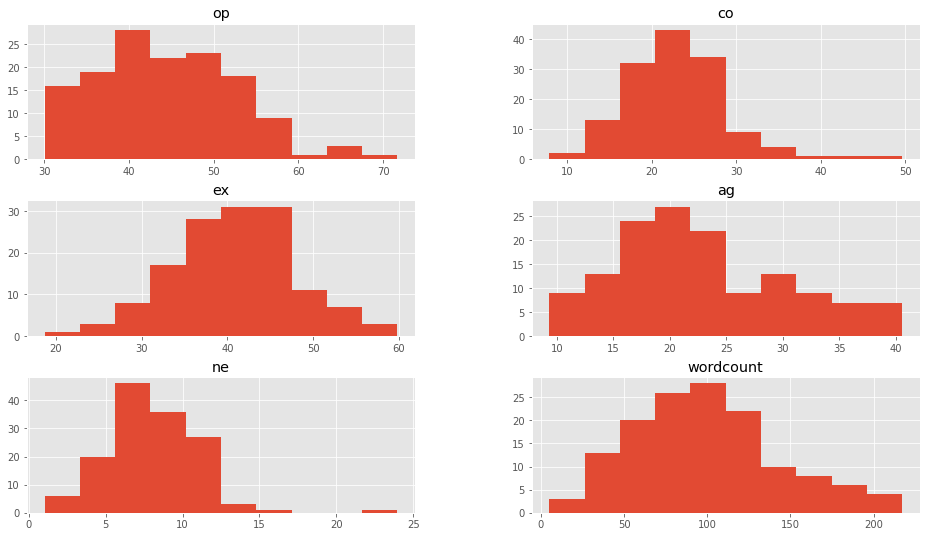

In [ ]:
datos.drop(['categoria'],1).hist()
plt.show()

In [ ]:
x = np.array(datos[['op','ex','ag']])
y = np.array(datos['categoria'])

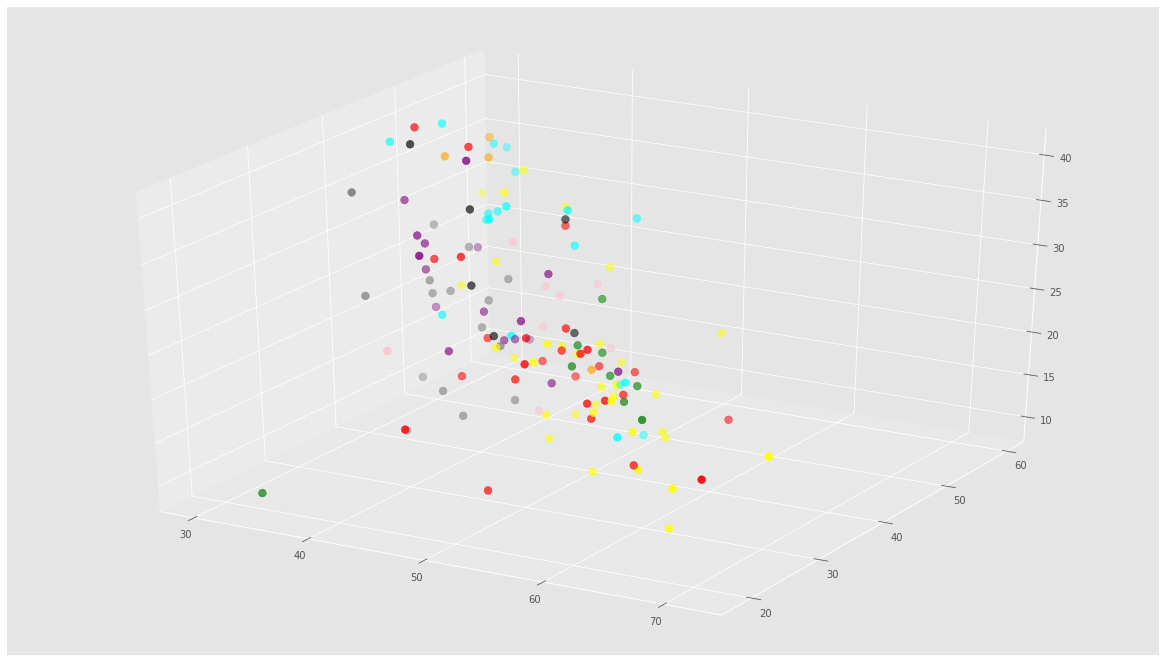

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue','red','yellow','green','cyan','orange','pink','purple','gray','black']
asignar =[]

for row in y:
  asignar.append(colores[row])

ax.scatter(x[:,0],x[:,1],x[:,2], c = asignar, s =60)

In [ ]:
## Modelado 

def dibujarDendograma(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  # Plot
  dendrogram(linkage_matrix, **kwargs)

In [ ]:
clusterCompleto = AgglomerativeClustering(affinity = 'euclidean', 
                                          linkage= 'complete',
                                          n_clusters=None,
                                          distance_threshold=0)

clusterCompleto.fit(x)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [ ]:
clusterPromedio = AgglomerativeClustering(affinity = 'euclidean', 
                                          linkage= 'average',
                                          n_clusters=None,
                                          distance_threshold=0)

clusterPromedio.fit(x)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [ ]:
clusterWard = AgglomerativeClustering(affinity = 'euclidean', 
                                          linkage= 'ward',
                                          n_clusters=None,
                                          distance_threshold=0)

clusterWard .fit(x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Text(0.5, 1.0, 'Distancia Euclidiana, Similitud Ward')

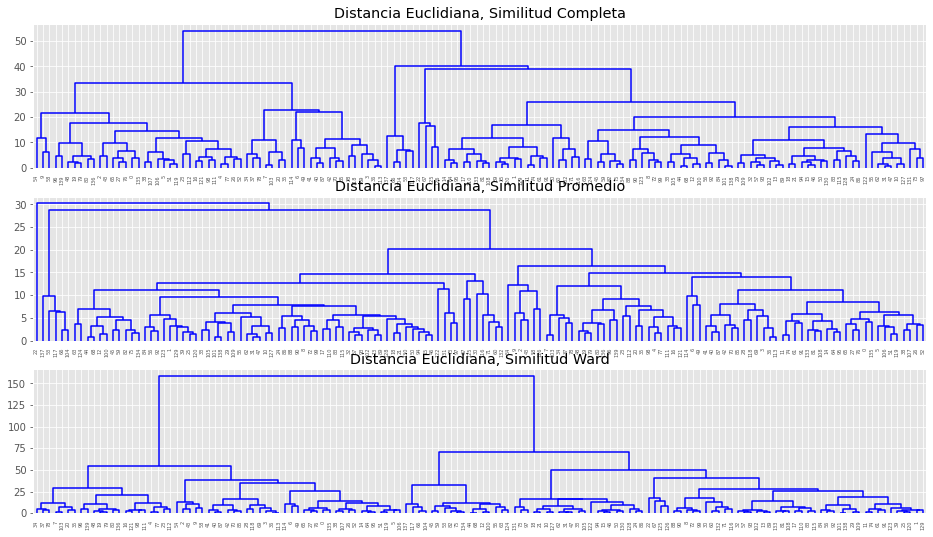

In [ ]:
fig, ax = plt.subplots(3,1)
dibujarDendograma(clusterCompleto,color_threshold=0, ax= ax[0])
ax[0].set_title('Distancia Euclidiana, Similitud Completa' )
dibujarDendograma(clusterPromedio,color_threshold=0, ax= ax[1])
ax[1].set_title('Distancia Euclidiana, Similitud Promedio' )
dibujarDendograma(clusterWard,color_threshold=0, ax= ax[2])
ax[2].set_title('Distancia Euclidiana, Similitud Ward' )

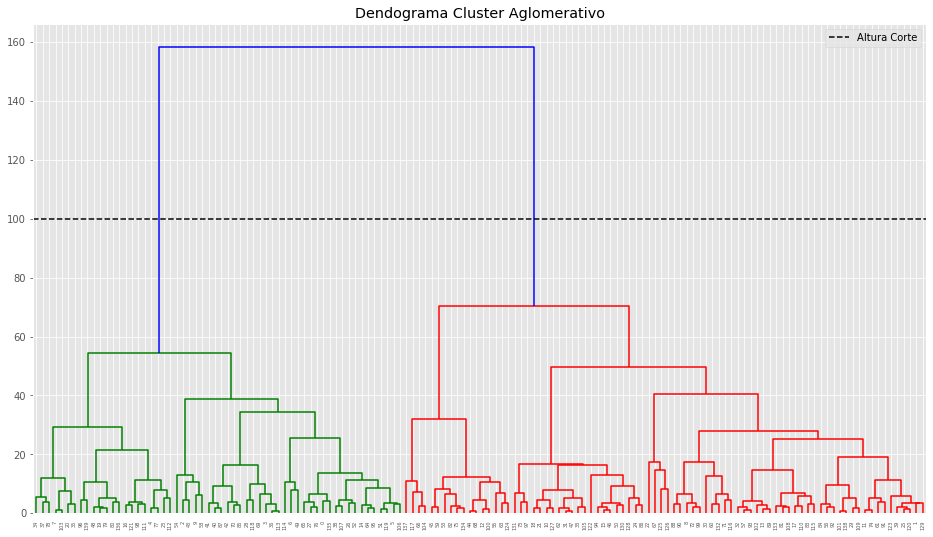

In [ ]:
fig, ax=plt.subplots(1,1)
alturaCorte = 100
dibujarDendograma(clusterWard, color_threshold = alturaCorte, ax=ax)
ax.set_title('Dendograma Cluster Aglomerativo')
ax.axhline(y= alturaCorte, c='black', linestyle='--', label='Altura Corte')
ax.legend()

In [ ]:
modelo= AgglomerativeClustering(affinity = 'euclidean', 
                                          linkage= 'ward',
                                          n_clusters=2)

modelo.fit(x)

AgglomerativeClustering()

In [ ]:
grupos=modelo.labels_
grupos

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1])

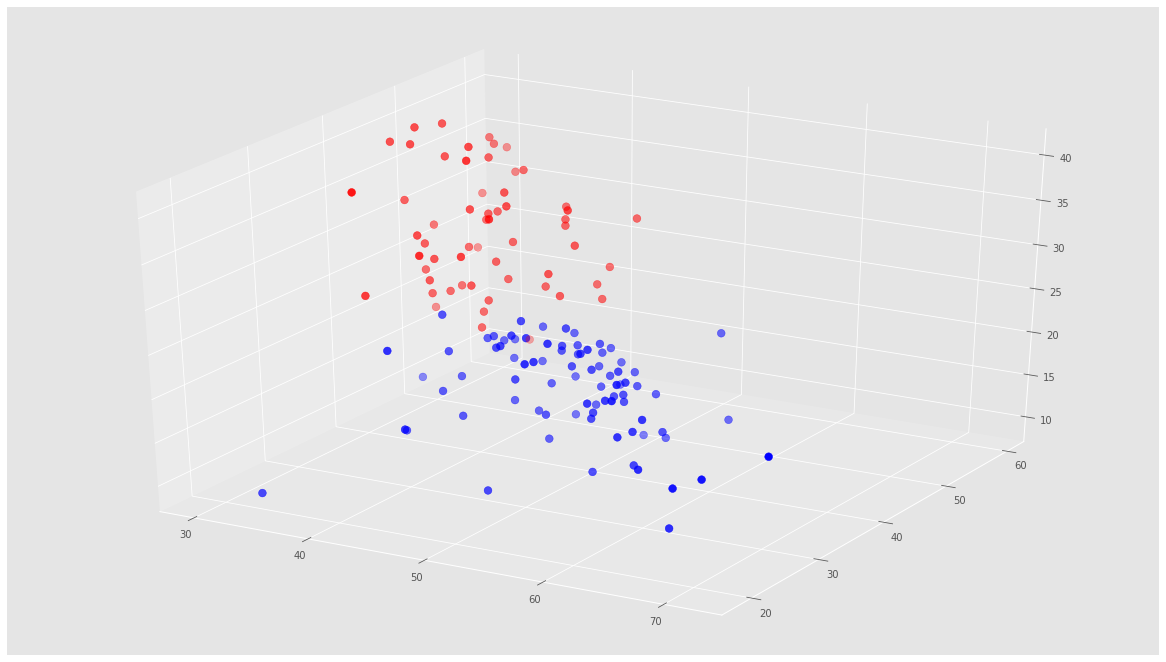

In [ ]:

colores = ['blue','red']
asignar =[]

for row in grupos:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1],x[:,2], c = asignar, s =60)